In [1]:
# 1. import everything
import numpy as np
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import pandas as pd
from flask import Flask, jsonify

In [2]:
# Database Setup
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
# Save reference to the table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
Base.classes.keys()

# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Design a query to retrieve the last 12 months of precipitation data and plot the results
first_row = session.query(Station).first()
first_row.__dict__
year_data = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date >= '2016-08-23').all()

# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [15]:
# Perform a query to retrieve the data and precipitation scores
year_data = pd.DataFrame(year_data)
graph = year_data.groupby('date').mean()
graph

,prcp
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
graph.plot(kind = 'bar', figsize = (200, 100))

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
graph.describe()

,prcp
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [18]:
# Design a query to show how many stations are available in this dataset?
stat_no = session.query(Measurement.station, Measurement.date).all()
stat_no = pd.DataFrame(stat_no)
stat_no = stat_no.groupby('station').count()
stat_no

,date
station,
USC00511918,1979
USC00513117,2709
USC00514830,2202
USC00516128,2612
USC00517948,1372
USC00518838,511
USC00519281,2772
USC00519397,2724
USC00519523,2669


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
list_station = stat_no.sort_values('date', ascending = False)
most_act = 'USC00519281'
list_station

,date
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded,
# highest temperature recorded, and average temperature of the most active station?
temps = session.query(Measurement.tobs, Measurement.date).filter(Measurement.station==most_act).all()
temps = pd.DataFrame(temps)
temps.describe()

,tobs
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


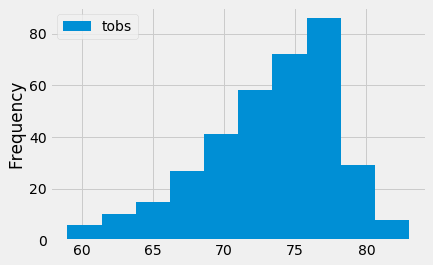

In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.date, Measurement.tobs, Measurement.station).filter(Measurement.date >= '2016-08-23').filter(Measurement.station == most_act).all()
tobs_data = pd.DataFrame(tobs_data)
tobs_data = tobs_data.set_index('date')
tobs_data
tobs_data.plot.hist()

In [24]:
# Flask Setup
app = Flask(__name__)

Flash Routes

In [25]:
@app.route("/")
def home():
    """List of all available api routes"""
    return (
        f"Available Routes: <br/> "
        f"/api/v1.0/precipitation <br/> "
        f"/api/v1.0/stations <br/> "
        f"/api/v1.0/tobs <br/> "
        f"/api/v1.0/start <br/>"
        f"/api/v1.0/start/end"
        )

In [26]:
# 4. Define what to do when a user hits the /precipitation route
@app.route("/api/v1.0/precipitation")
def precipitation():
    # Create our session (link) from Python to the DB
    session = Session(engine)
    # Query date, precipitation
    results = session.query(Measurement.date, Measurement.prcp).all()
    session.close()

In [30]:
 # Convert list of tuples into normal list
all_dates = []
    for date, prcp in results:
        dates_dict = {}
        dates_dict["date"] = date
        dates_dict["prcp"] = prcp
        all_dates.append(dates_dict)
    return jsonify(all_dates)

IndentationError: unexpected indent (<ipython-input-30-dd7ce4775105>, line 3)

In [31]:
@app.route("/api/v1.0/stations")
def station():
    session = Session(engine)
    results = session.query(Station.station).all()
    session.close()
    all_station = []
    for station in results:
        station_dict = {}
        station_dict["station"] = station
        all_station.append(station_dict)
    return jsonify(all_station)

In [32]:
@app.route("/api/v1.0/tobs")
def tobs():
    session = Session(engine)
    results = session.query(Measurement.date, Measurement.tobs, Measurement.station).filter(Measurement.date >= '2016-08-23').filter(Measurement.station == 'USC00519281').all()
    session.close()
    all_tobs = []
    for date, tob, station in results:
        tobs_dict = {}
        tobs_dict["tobs"] = tob
        tobs_dict["date"] = date
        tobs_dict["station"] = station
        all_tobs.append(tobs_dict)
    return jsonify(all_tobs)

In [33]:
@app.route("/api/v1.0/<start_d>")
def start(start_d):
    session = Session(engine)
    results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= start_d).all()
    session.close()
    all_start = []
    for date, tob in results:
        start_dict = {}
        start_dict["tobs"] = tob
        start_dict["date"] = date
        all_start.append(start_dict) 
    start_df = pd.DataFrame(all_start, columns = ['tobs', 'date'])
    start_df = start_df.set_index("date")
    min = start_df['tobs'].min()
    max = start_df['tobs'].max()
    mean = start_df['tobs'].mean()
    return (
        f"Mean: {mean}<br/> "
        f"Minimum: {min} <br/> "
        f"Maximum: {max}"
        )

In [34]:
@app.route("/api/v1.0/<start_d>/<end>")
def end(start_d, end):
    session = Session(engine)
    results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= start_d).filter(Measurement.date <= end).all()
    session.close()

In [39]:
all_end = []
    for date, tob in results:
        end_dict = {}
        end_dict["tobs"] = tob
        end_dict["date"] = date
        all_end.append(end_dict) 
    end_df = pd.DataFrame(all_end, columns = ['tobs', 'date'])
    end_df = end_df.set_index("date")
    min = end_df['tobs'].min()
    max = end_df['tobs'].max()
    mean = end_df['tobs'].mean()
    return (
        f"Mean: {mean}<br/> "
        f"Minimum: {min} <br/> "
        f"Maximum: {max}"
        )
if __name__ == "__main__":
    app.run(debug=True)

IndentationError: unexpected indent (<ipython-input-39-88e93783e669>, line 2)